In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

# The Human Eye

In [2]:
def optimal_dist(size, resolution, max_dist):
    max_spatial_freq = 60
    d = size[0]/(np.tan(resolution[0]/(2*max_spatial_freq)))
    return d if (d<max_dist) else max_dist

In [3]:
size_str = input("Please Enter the size(W X H) in inches:- ")
sizes = size_str.split("X")
size = (int(sizes[0]), int(sizes[1]))

resolution_str = input("Please Enter the resolution(Wp X Hp) in pixels:- ")
resolutions = resolution_str.split("X")
resolution = (int(resolutions[0]), int(resolutions[1]))

available_distance = int(input("Please Enter the available distance in inches:- ")) 
print("\nA couch placed at a distance of {} inch from TV will have very high contrast sensitivity.".format(np.round(optimal_dist(size, resolution, available_distance), 2)))

Please Enter the size(W X H) in inches:- 32X34
Please Enter the resolution(Wp X Hp) in pixels:- 1920X1080
Please Enter the available distance in inches:- 120

A couch placed at a distance of 106.44 inch from TV will have very high contrast sensitivity.


# Gray Scale Images
Reading images, Please provide relative path to the images.

In [6]:
img_airplane = mpimg.imread("5.1.11.tiff")
img_apc = mpimg.imread("7.1.08.tiff")
img_aerial = mpimg.imread("5.2.09.tiff")
img_airport = mpimg.imread("5.3.02.tiff")
img_truck = mpimg.imread("7.1.01.tiff")

## Q1
Plotting APC, Airplane, Aerial Images in a subplot.

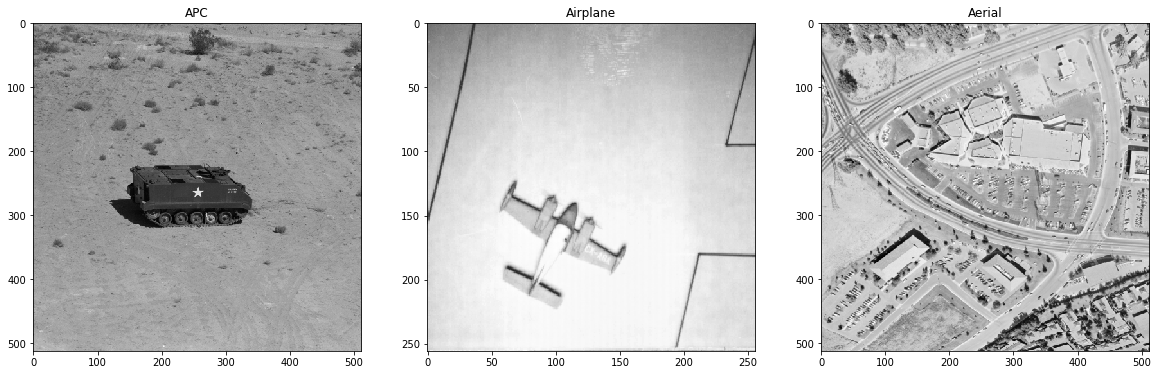

In [7]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(1, 3, 1)
plt.title("APC")
plt.imshow(img_apc, cmap='gray',interpolation='none')

plt.subplot(1, 3, 2)
plt.title("Airplane")
plt.imshow(img_airplane, cmap='gray',interpolation='none')

plt.subplot(1, 3, 3)
plt.title("Aerial")
plt.imshow(img_aerial, cmap='gray',interpolation='none')

## Q2
Analysis of APC is done to observe maximum & minimum pixel values, # of bits needed per pixel, Resolution of image, and Total # of pixels used.

In [8]:
print("Analysis of APC image:-\n")
minimum_pixel = np.min(img_apc)
maximum_pixel = np.max(img_apc)
print("Maximum pixel value is {} and Minimum value is {} .".format(maximum_pixel, minimum_pixel))

Nbits = int(np.ceil(np.log2(maximum_pixel)))
print("{} bits are used per pixel.".format(Nbits))

Npixels = img_apc.shape[0]*img_apc.shape[1]
print("Resolution of the image is {}x{}, In total of {} pixels are used.".format(img_apc.shape[0], img_apc.shape[1], Npixels))

Analysis of APC image:-

Maximum pixel value is 215 and Minimum value is 12 .
8 bits are used per pixel.
Resolution of the image is 512x512, In total of 262144 pixels are used.


## Q3
Here also APC image is used for observing size of the file and measuring how efficient is the compression.

In [9]:
import os

csize = os.path.getsize("7.1.08.tiff")
print("Size of compressed is {} bytes.".format(csize))
print("The compressed image is {}% less than calculated size.".format(np.round((1-(8*csize/(Npixels*Nbits)))*100, 2)))

Size of compressed is 262278 bytes.
The compressed image is -0.05% less than calculated size.


#### Turns out that TIFF encoding is lossless thus it is almost same as estimated size, but there is some extra meta data also included making compressed image size slightly more than estimated.

## Q4
The function $\textit{get_b_coeff}$ calculates $\textit{b}$th bit value in number $\textit{n}$.\
The function $\textit{display_b_plane}$ extract and plots all bit plane of given image $\textit{I}$.

In [10]:
def get_b_coeff(n, b):
    n >>= b
    return n%2

def display_b_plane(I, b):
    bin_img = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            bin_img[i, j] = get_b_coeff(I[i, j], b)
    plt.imshow(bin_img, cmap='gray')
    plt.title("{} Plane".format(b)) 

#### Bitplanes of APC Image

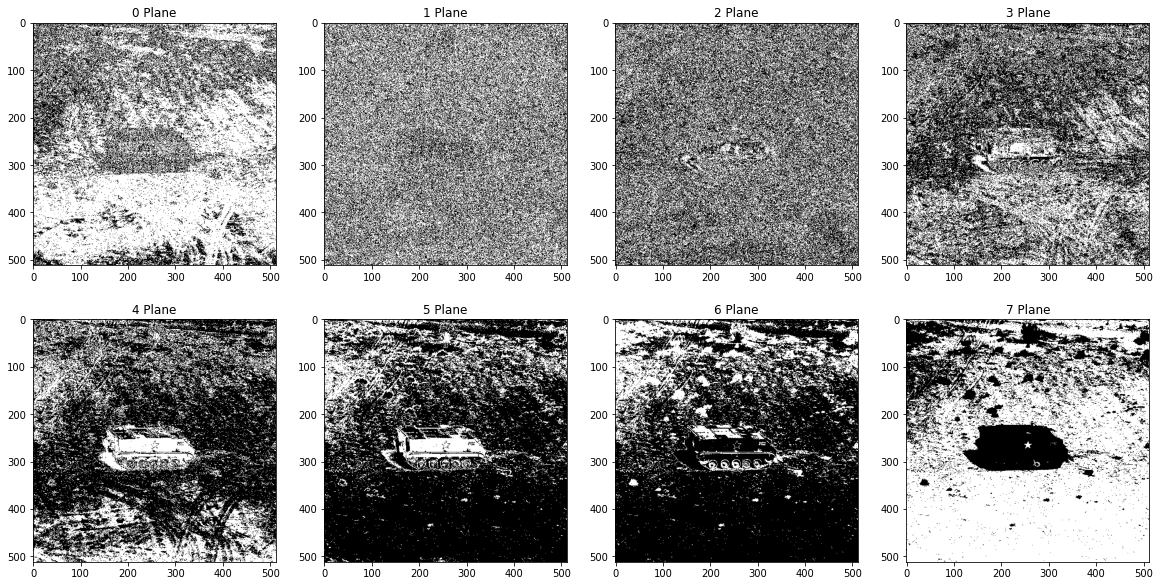

In [11]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img_apc, i)

#### Bitplanes of Airplane Image

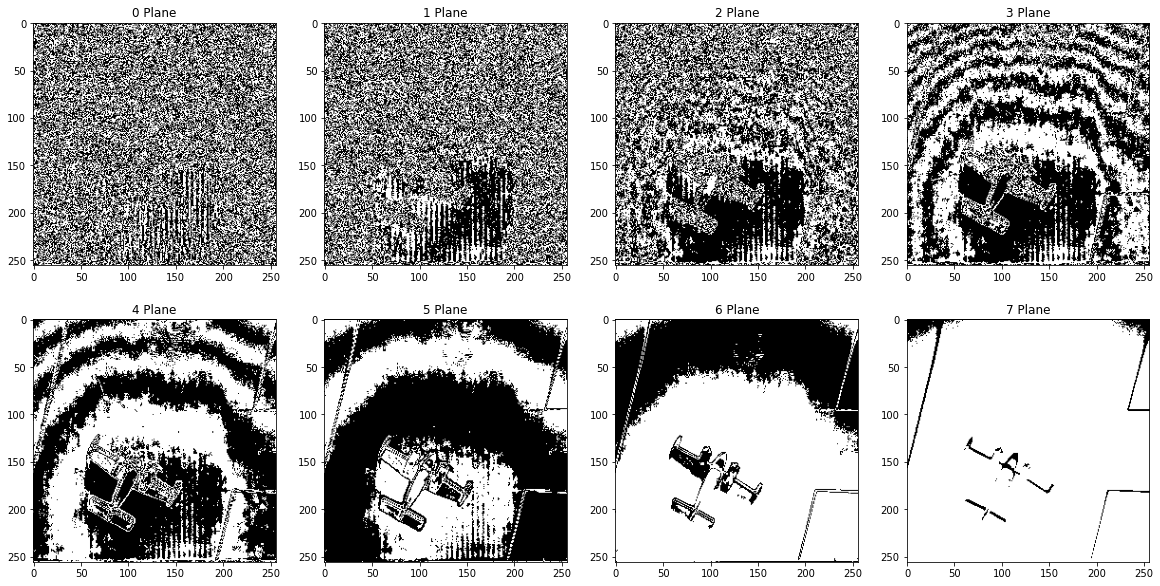

In [12]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img_airplane, i)

#### Bitplanes of Airport Image

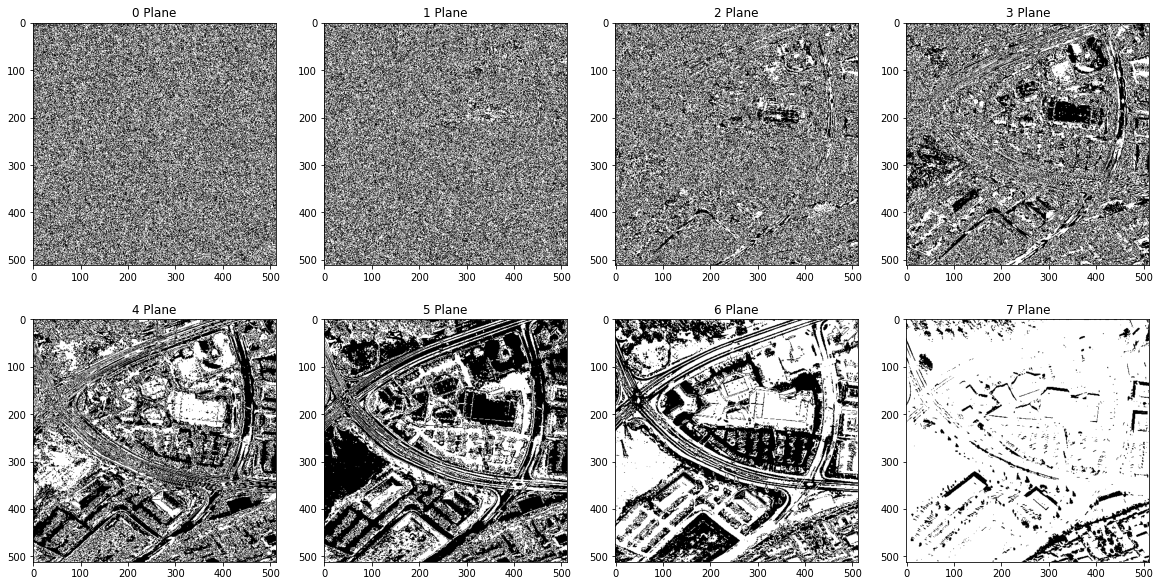

In [13]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img_aerial, i)

# Binary Image Processing

## Q1
The function $\textit{histogram}$ computes frequency of all gray levels for a given image $\textit{I}$ and bits used $\textit{Nbits}$.

In [14]:
def histogram(I, Nbits):
    counter = np.zeros(2**Nbits)
    
    for i in I.ravel():
        counter[i] += 1
    return np.array([np.arange(2**Nbits), counter]) 

Computation of histogram and plotting for images APC, Airplane, Truck and Airport.

Text(0, 0.5, 'Count')

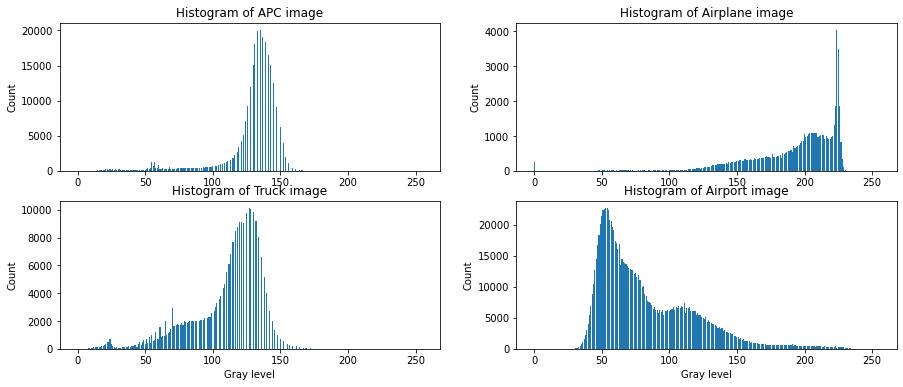

In [15]:
hist_apc = histogram(img_apc, Nbits)
hist_airplane = histogram(img_airplane, Nbits)
hist_airport = histogram(img_airport, Nbits)
hist_truck = histogram(img_truck, Nbits)

plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(2, 2, 1)
plt.title("Histogram of APC image")
plt.bar(hist_apc[0], hist_apc[1])
plt.ylabel("Count")

plt.subplot(2, 2, 2)
plt.title("Histogram of Airplane image")
plt.bar(hist_airplane[0], hist_airplane[1])
plt.ylabel("Count")

plt.subplot(2, 2, 3)
plt.title("Histogram of Truck image")
plt.bar(hist_truck[0], hist_truck[1])
plt.xlabel("Gray level")
plt.ylabel("Count")

plt.subplot(2, 2, 4)
plt.title("Histogram of Airport image")
plt.bar(hist_airport[0], hist_airport[1])
plt.xlabel("Gray level")
plt.ylabel("Count")

## Observed modailities of the histogram for the images

In [16]:
print("Modality of APC image is {}".format(int(hist_apc[0, np.argmax(hist_apc[1,:])])))
print("Modality of Airplane image is {}".format(int(hist_airplane[0, np.argmax(hist_airplane[1,:])])))
print("Modality of Truck image is {}".format(int(hist_truck[0, np.argmax(hist_truck[1,:])])))
print("Modality of Airport image is {}".format(int(hist_airport[0, np.argmax(hist_airport[1,:])])))

Modality of APC image is 135
Modality of Airplane image is 224
Modality of Truck image is 127
Modality of Airport image is 54


## Q2
The function $\textit{thresh}$ binary quantizes the image based on a given threshould.\
The function $\textit{modal_threshoulding_algo}$ returns mode of the image which is proposed threshould.

In [17]:
def thresh(I, T):
    return (I>T).astype(int)

def modal_threshoulding_algo(hist, plot=False, title=""):
    t0 = int(hist[0, np.argmax(hist[1,:])])
 
    if(plot==True):
        plt.title(title)
        plt.bar(hist[0, :t0], hist[1, :t0], color="darkorange")
        plt.bar(hist[0, t0:], hist[1, t0:], color="bisque")
        plt.axvline(x=t0, linestyle="--", color="blueviolet")
        plt.xlabel("Gray Level")
        plt.ylabel("Count")
        
    return t0 

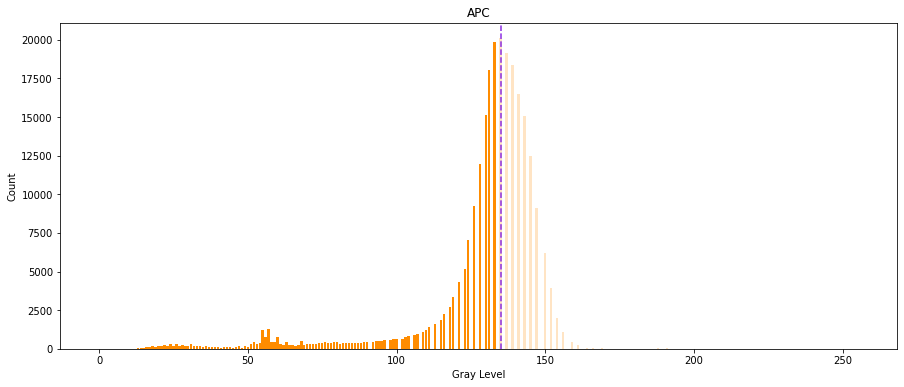

In [18]:
t_apc = modal_threshoulding_algo(hist_apc, plot=True, title="APC")
bin_img_apc = thresh(img_apc, t_apc)

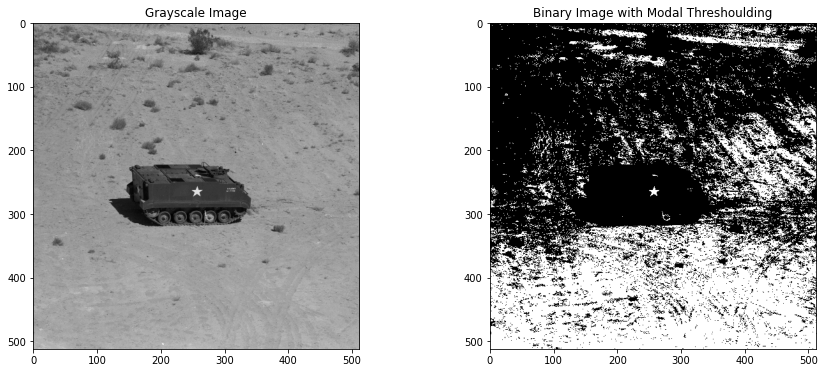

In [19]:
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_apc, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Modal Threshoulding")
plt.imshow(bin_img_apc, cmap='gray')

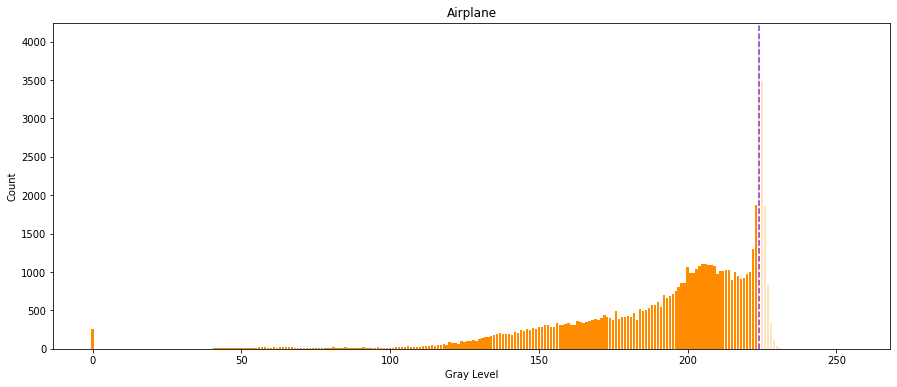

In [20]:
t_airplane = modal_threshoulding_algo(hist_airplane, plot=True, title="Airplane")
bin_img_airplane = thresh(img_airplane, t_airplane)

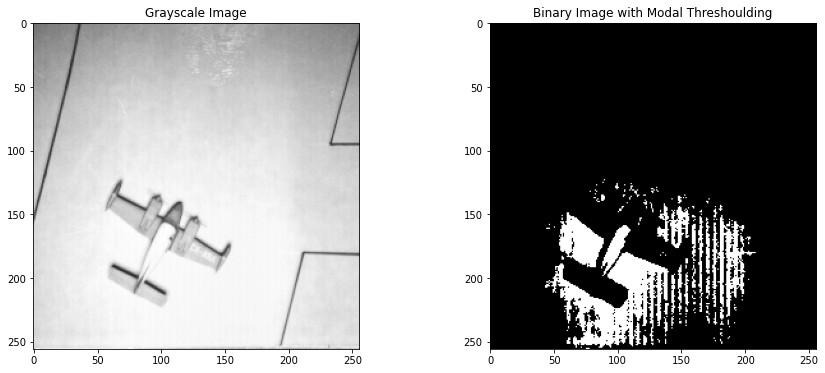

In [21]:
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airplane, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Modal Threshoulding")
plt.imshow(bin_img_airplane, cmap='gray')

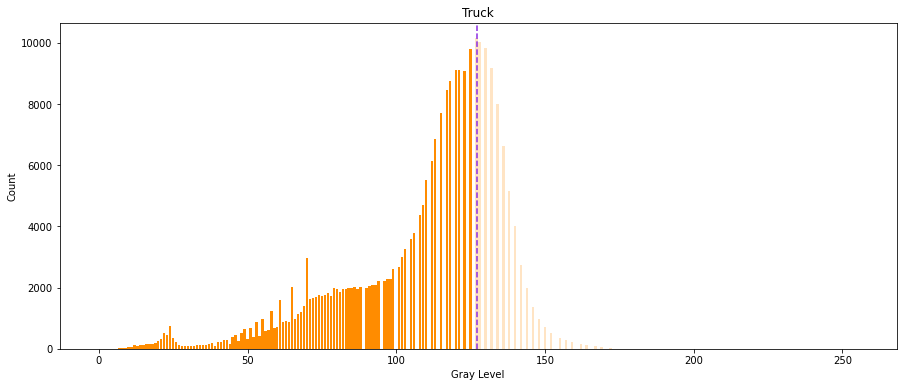

In [22]:
t_truck = modal_threshoulding_algo(hist_truck, plot=True, title="Truck")
bin_img_truck = thresh(img_truck, t_truck)

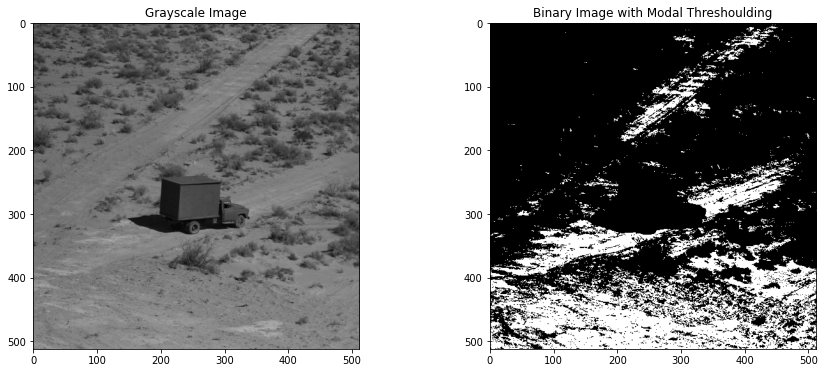

In [23]:
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_truck, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Modal Threshoulding")
plt.imshow(bin_img_truck, cmap='gray')

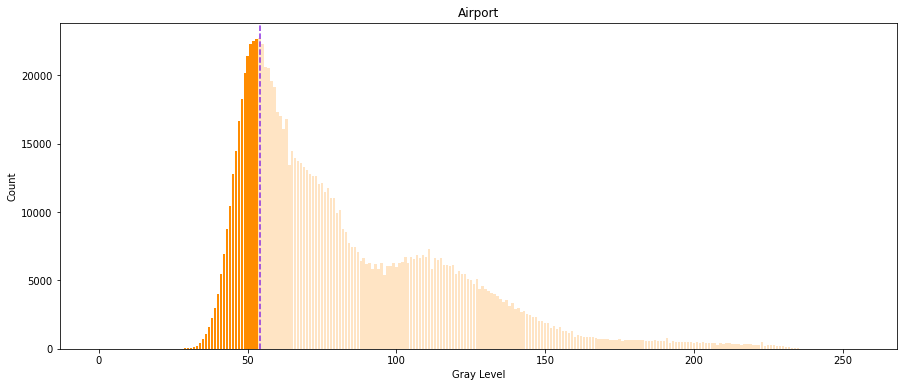

In [24]:
t_airport = modal_threshoulding_algo(hist_airport, plot=True, title="Airport")
bin_img_airport = thresh(img_airport, t_airport)

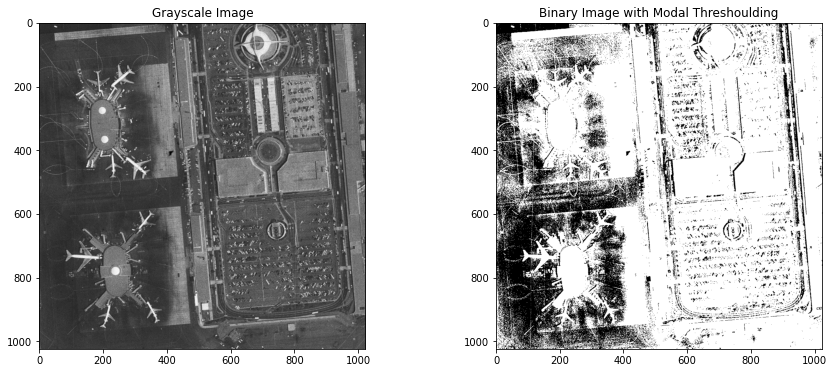

In [25]:
plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airport, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Modal Threshoulding")
plt.imshow(bin_img_airport, cmap='gray')

## Q3 (a)
The function $\textit{otsu_algo_a}$ is implementation of Otsu's algorithm which finds a threshould for which intra-class variance is minimized.

In [26]:
def mean(data, counts):
    return np.sum(data*counts)/np.sum(counts)

def var(data, counts):
    m = mean(data, counts)
    return np.sum((np.power(data - m, 2))*counts)/np.sum(counts)

def otsu_algo_a(I, Nbits, plot=False, title=""):
    bin_I = I.copy()
    hist = histogram(I, Nbits)
    pmf = hist[1]/np.sum(hist[1])
    
    intra_class_var = []
    
    gray_level = np.array([i for i in range(2**Nbits)])
    
    for t in range(2**Nbits):
        p0 = np.sum(pmf[0:t])
        p1 = 1-p0
        if(p0 == 0):
            var0 = 0
            var1 = var(gray_level[t:], hist[1, t:])
        elif(p0 == 1):
            var0 = var(gray_level[0:t], hist[1, 0:t])
            var1 = 0
        else:
            var0 = var(gray_level[0:t], hist[1, 0:t])
            var1 = var(gray_level[t:], hist[1, t:])
        intra_class_var.append(p0*var0 + p1*var1)
    t0 = np.argmin(intra_class_var)
    
    if(plot==True):
        plt.rcParams["figure.figsize"] = (8,6)
        
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.bar(hist[0, :t0], hist[1, :t0], color="darkorange")
        ax.bar(hist[0, t0:], hist[1, t0:], color="bisque")
        ax.axvline(x=t0, linestyle="--", color="blueviolet")
        ax.set_xlabel("Gray Level")
        ax.set_ylabel("Count")
        
        ax2 = ax.twinx()
        ax2.plot(hist[0], intra_class_var)
        ax2.plot(t0, intra_class_var[t0], "*r")
        ax2.set_ylabel("Intra Class Variance")
        ax2.text(t0*1.01, 1.05*intra_class_var[t0], r'$\mathbf{t_0}$', fontsize=12)
    
    return (intra_class_var[t0], t0)

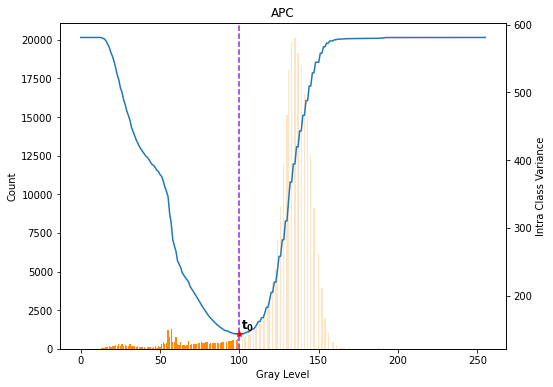

In [27]:
otsu_a_times = []

start = time.time()
var_apc_oa, t_apc_oa = otsu_algo_a(img_apc, Nbits, plot=True, title="APC")
end = time.time()

otsu_a_times.append(end - start)

Optimal threshould is 100 for which intra-class variance is 143.41233392454853.


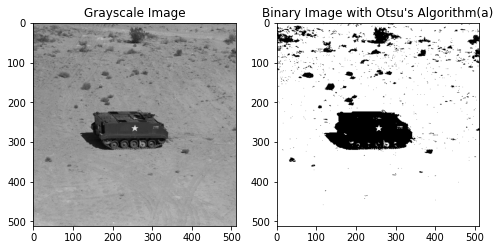

In [28]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_apc_oa, var_apc_oa))
bin_img_apc_oa = thresh(img_apc, t_apc_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_apc, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_apc_oa, cmap='gray')

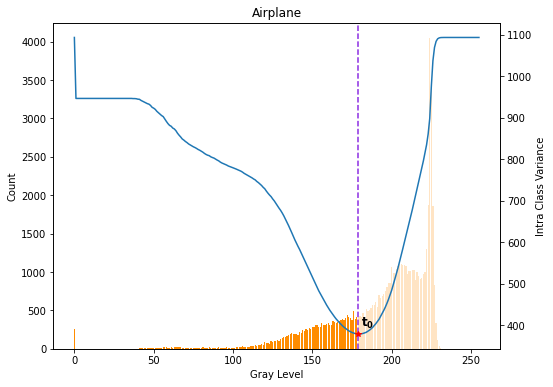

In [29]:
start = time.time()
var_airplane_oa, t_airplane_oa = otsu_algo_a(img_airplane, Nbits, plot=True, title="Airplane")
end = time.time()

otsu_a_times.append(end - start)

Optimal threshould is 179 for which intra-class variance is 379.2686608196306.


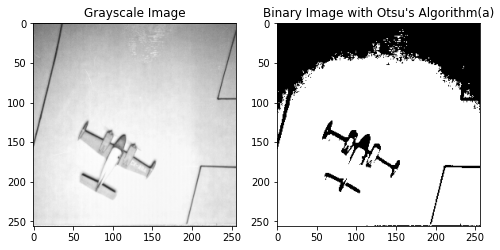

In [30]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_airplane_oa, var_airplane_oa))
bin_img_airplane_oa = thresh(img_airplane, t_airplane_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airplane, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_airplane_oa, cmap='gray')

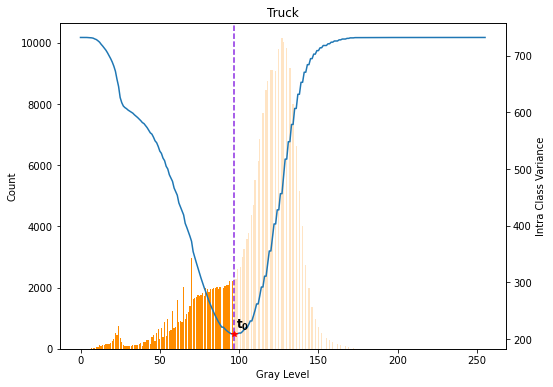

In [31]:
start = time.time()
var_truck_oa, t_truck_oa = otsu_algo_a(img_truck, Nbits, plot=True, title="Truck")
end = time.time()

otsu_a_times.append(end - start)

Optimal threshould is 97 for which intra-class variance is 208.77363353318725.


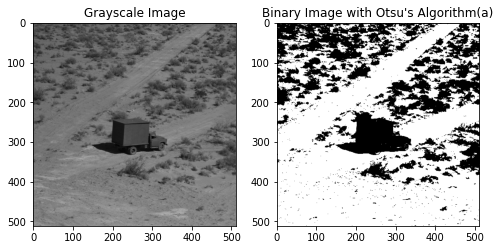

In [32]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_truck_oa, var_truck_oa))
bin_img_truck_oa = thresh(img_truck, t_truck_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_truck, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_truck_oa, cmap='gray')


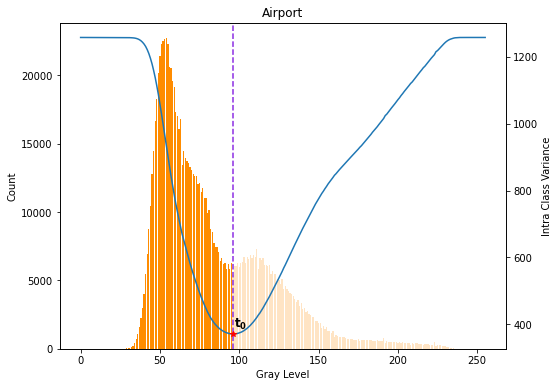

In [33]:
start = time.time()
var_airport_oa, t_airport_oa = otsu_algo_a(img_airport, Nbits, plot=True, title="Airport")
end = time.time()

otsu_a_times.append(end - start)

Optimal threshould is 96 for which intra-class variance is 370.99647750626684.


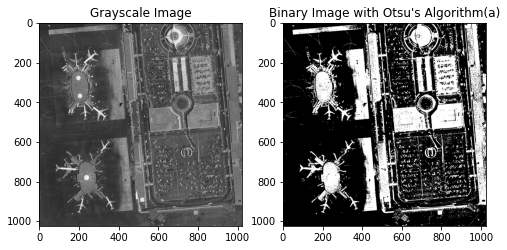

In [34]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_airport_oa, var_airport_oa))
bin_img_airport_oa = thresh(img_airport, t_airport_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airport, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_airport_oa, cmap='gray')


## Q3 (b)
Intra-class variance(or Within class Variance) ${\sigma}^2_w = P_0{\sigma}^2_0 + P_1{\sigma}^2_1$\
Intra-class variance(or Within class Variance) ${\sigma}^2_b = P_0{({\mu}_0 - \mu)^2} + P_1{({\mu}_1 - \mu)^2}$\
$\begin{gather*}
{\sigma}^2_b = P_0\left({\mu}_0 - (P_0{\mu_0} + P_1{\mu_1})\right)^2 + P_1\left({\mu}_1 - (P_0{\mu_0} + P_1{\mu_1})\right)^2\\
{\sigma}^2_b = P_0P^2_1({\mu}_0 - {\mu}_1)^2 + P^2_0P_1({\mu}_1 - {\mu}_0)^2\\
\implies \boxed{{\sigma}^2_b = P_0P_1({\mu}_0 - {\mu}_1)^2}
\end{gather*}$

The function $\textit{otsu_algo_b}$ finds the threshould for an image such that inter-class variance is maximized, theoritically above implementation also yeild the same result.

In [35]:
def var_b(P0, mu0, mu1):
    return P0*(1-P0)*np.power(mu0-mu1, 2)
    
def otsu_algo_b(I, Nbits, plot=False, title=""):
    hist = histogram(I, Nbits)
    pmf = hist[1]/np.sum(hist[1])
    total_sum = np.sum(hist[1])
    mu = mean(hist[0], hist[1])

    inter_class_var = []
    
    P0 = 0
    mu0 = 0
    for i in range(2**Nbits):
        prev_P0 = P0
        P0 += pmf[i]
        if(P0 == 0):
            inter_class_var.append(0)
        elif(P0 == 1):
            inter_class_var.append(0)
        else:
            mu0 = (mu0*prev_P0 + i*pmf[i])/P0
            mu1 = (mu - mu0*P0)/(1 - P0)
            inter_class_var.append(var_b(P0, mu0, mu1))
        
        
    t0 = np.argmax(inter_class_var) + 1
    
    if(plot==True):
        plt.rcParams["figure.figsize"] = (8,6)
        
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.bar(hist[0, :t0], hist[1, :t0], color="darkorange")
        ax.bar(hist[0, t0:], hist[1, t0:], color="bisque")
        ax.axvline(x=t0, linestyle="--", color="blueviolet")
        ax.set_xlabel("Gray Level")
        ax.set_ylabel("Count")
        
        ax2 = ax.twinx()
        ax2.plot(hist[0], inter_class_var)
        ax2.plot(t0, inter_class_var[t0], "*r")
        ax2.set_ylabel("Inter Class Variance")
        ax2.text(t0*1.01, 0.95*inter_class_var[t0], r'$\mathbf{t_0}$', fontsize=12)
        
    return (inter_class_var[t0], t0) 

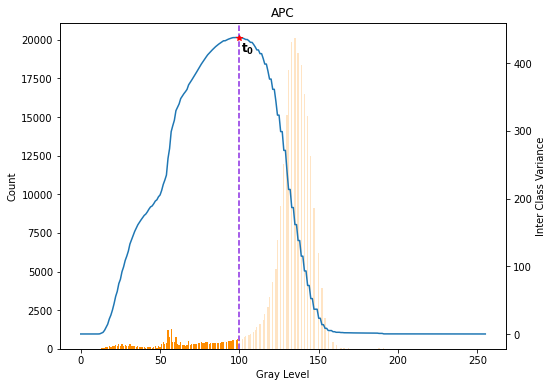

In [36]:
otsu_b_times = []

start = time.time()
var_apc_ob, t_apc_ob = otsu_algo_b(img_apc, Nbits, plot=True, title="APC")
end = time.time()

otsu_b_times.append(end - start)

Optimal threshould is 100 for which black-class variance is 437.67065045828946.


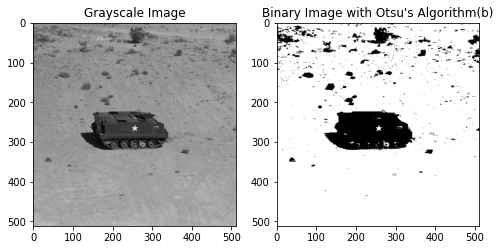

In [37]:
bin_img_apc_ob = thresh(img_apc, t_apc_ob)
print("Optimal threshould is {} for which black-class variance is {}.".format(t_apc_ob, var_apc_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_apc, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_apc_ob, cmap='gray')

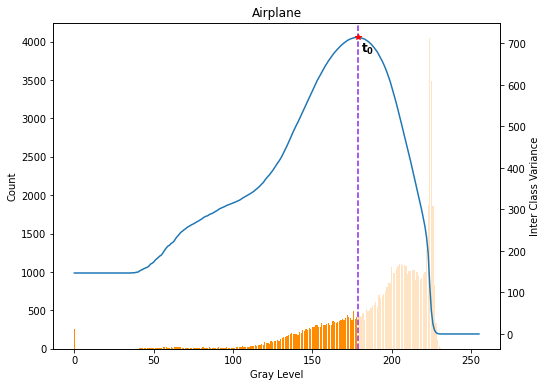

In [38]:
start = time.time()
var_airplane_ob, t_airplane_ob = otsu_algo_b(img_airplane, Nbits, plot=True, title="Airplane")
end = time.time()

otsu_b_times.append(end - start)

Optimal threshould is 179 for which inter-class variance is 714.4371051958252.


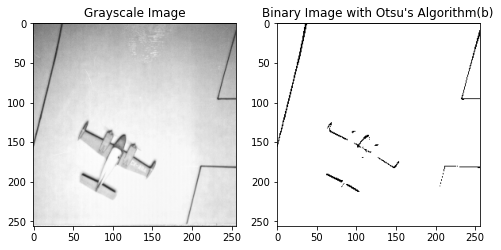

In [39]:
bin_img_airplane_ob = thresh(img_airplane, t_apc_ob)
print("Optimal threshould is {} for which inter-class variance is {}.".format(t_airplane_ob, var_airplane_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airplane, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_airplane_ob, cmap='gray')

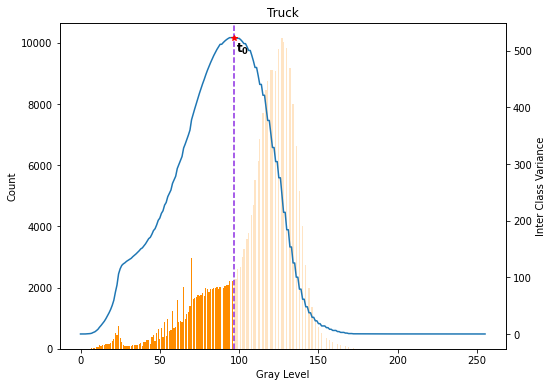

In [40]:
start = time.time()
var_truck_ob, t_truck_ob = otsu_algo_b(img_truck, Nbits, plot=True, title="Truck")
end = time.time()

otsu_b_times.append(end - start)

Optimal threshould is 97 for which inter-class variance is 523.5766219832658.


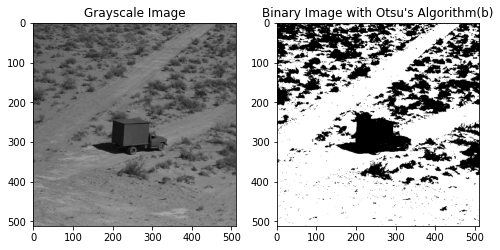

In [41]:
bin_img_truck_ob = thresh(img_truck, t_truck_ob)
print("Optimal threshould is {} for which inter-class variance is {}.".format(t_truck_ob, var_truck_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_truck, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_truck_ob, cmap='gray')

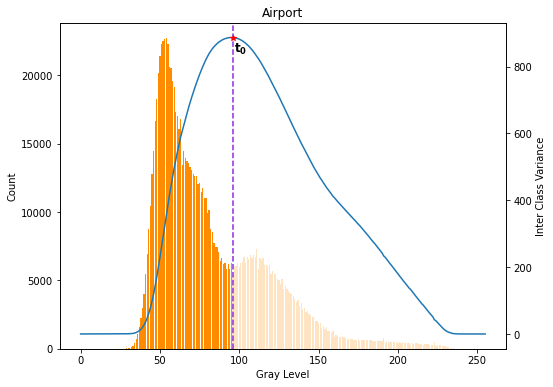

In [42]:
start = time.time()
var_airport_ob, t_airport_ob = otsu_algo_b(img_airport, Nbits, plot=True, title="Airport")
end = time.time()

otsu_b_times.append(end - start)

Optimal threshould is 96 for which inter-class variance is 886.7713045898263.


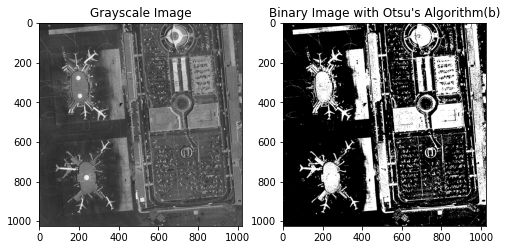

In [43]:
bin_img_airport_ob = thresh(img_airport, t_airport_ob)
print("Optimal threshould is {} for which inter-class variance is {}.".format(t_airport_ob, var_airport_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airport, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_airport_ob, cmap='gray')

## Comparision between Otsu's implementations

In [44]:
import pandas as pd

images = ["APC", "Airplane", "Truck", "Airport"]
otsu_a_thresh = [t_apc_oa, t_airplane_oa, t_truck_oa, t_airport_oa]
otsu_b_thresh = [t_apc_ob, t_airplane_ob, t_truck_ob, t_airport_ob]

df = pd.DataFrame({"Image":images, "Otsu(a) Thresh":otsu_a_thresh, "Otsu(a) Time(in s)":otsu_a_times, "Otsu(b) Thresh":otsu_b_thresh, "Otsu(b) Time(in s)":otsu_b_times}, index=None)
display(df)

Image  Otsu(a) Thresh  Otsu(a) Time(in s)  Otsu(b) Thresh  \
0       APC             100            0.503094             100   
1  Airplane             179            0.307422             179   
2     Truck              97            0.329745              97   
3   Airport              96            0.937423              96   

   Otsu(b) Time(in s)  
0            0.435915  
1            0.397501  
2            0.747312  
3            1.015924

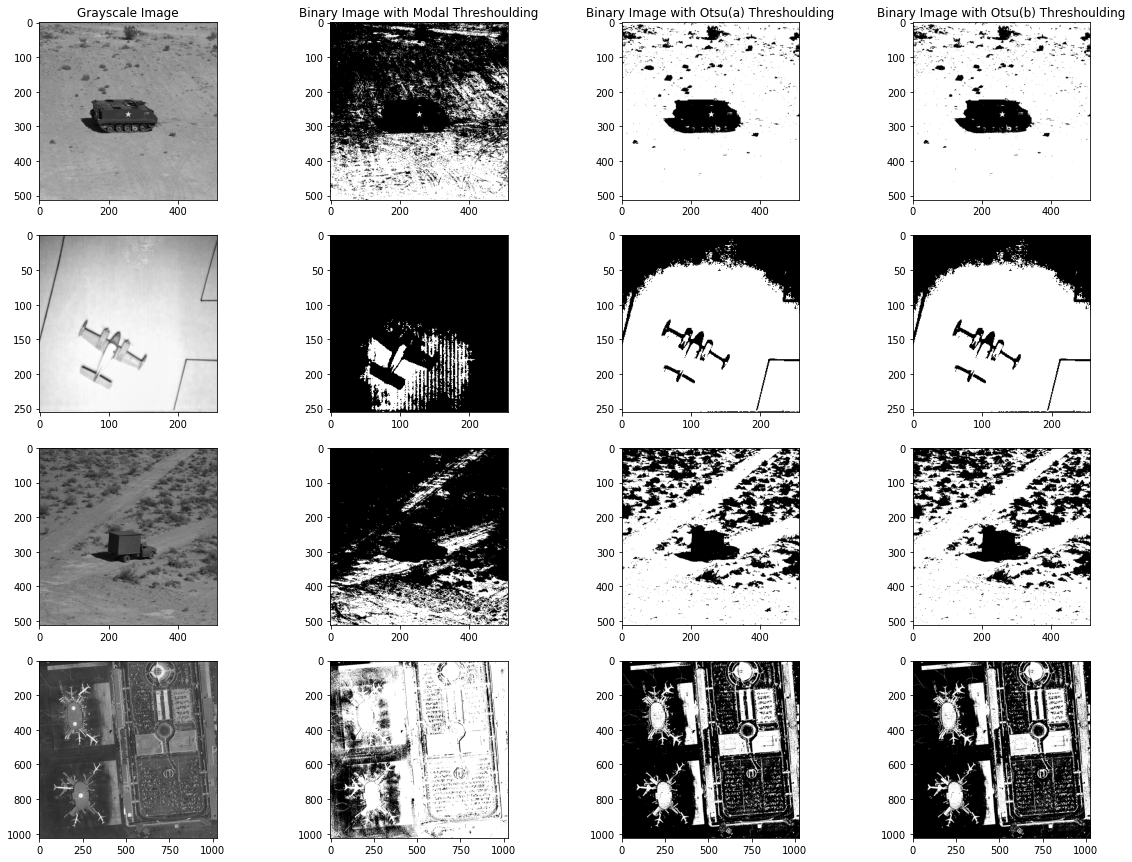

In [45]:
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(4, 4, 1)
plt.title("Grayscale Image")
plt.imshow(img_apc, cmap='gray')

plt.subplot(4, 4, 2)
plt.title("Binary Image with Modal Threshoulding")
plt.imshow(bin_img_apc, cmap='gray')

plt.subplot(4, 4, 3)
plt.title("Binary Image with Otsu(a) Threshoulding")
plt.imshow(bin_img_apc_oa, cmap='gray')

plt.subplot(4, 4, 4)
plt.title("Binary Image with Otsu(b) Threshoulding")
plt.imshow(bin_img_apc_ob, cmap='gray')

plt.subplot(4, 4, 5)
plt.imshow(img_airplane, cmap='gray')

plt.subplot(4, 4, 6)
plt.imshow(bin_img_airplane, cmap='gray')

plt.subplot(4, 4, 7)
plt.imshow(bin_img_airplane_oa, cmap='gray')

plt.subplot(4, 4, 8)
plt.imshow(bin_img_airplane_oa, cmap='gray')

plt.subplot(4, 4, 9)
plt.imshow(img_truck, cmap='gray')

plt.subplot(4, 4, 10)
plt.imshow(bin_img_truck, cmap='gray')

plt.subplot(4, 4, 11)
plt.imshow(bin_img_truck_oa, cmap='gray')

plt.subplot(4, 4, 12)
plt.imshow(bin_img_truck_ob, cmap='gray')

plt.subplot(4, 4, 13)
plt.imshow(img_airport, cmap='gray')

plt.subplot(4, 4, 14)
plt.imshow(bin_img_airport, cmap='gray')

plt.subplot(4, 4, 15)
plt.imshow(bin_img_airport_oa, cmap='gray')

plt.subplot(4, 4, 16)
plt.imshow(bin_img_airport_ob, cmap='gray')

## Q4
The function $\textit{connected_component}$ is the implementation of connected components algorithm, Disjoint-Set Data Structure is used for linking the sets.\
The function $\textit{get_neighbours}$ returns list of valid neighbhours.\
The function $\textit{find_set}$ returns representative element(or label) for a given set from Disjoint-Set.\
The function $\textit{complement}$ just complements the binary input image.

In [46]:
def complement(bin_I):
    c_bin_I = bin_I.copy()
    for i in range(c_bin_I.shape[0]):
        for j in range(c_bin_I.shape[1]):
            c_bin_I[i, j] = 1 - c_bin_I[i, j]
    return c_bin_I

def get_neighbours(i, j, labels):
    M, N = labels.shape
    neighbours = []
    if(i>=1):
        neighbours.append(labels[i-1, j])
    if(j>=1):
        neighbours.append(labels[i, j-1])
    if(i<(M-1)):
        neighbours.append(labels[i+1, j])
    if(j<(N-1)):
        neighbours.append(labels[i, j+1])
     
    return neighbours

def find_set(x, disjoint_set):
    rep = min(disjoint_set[x])
    while x != rep:
        x = rep
        rep = min(disjoint_set[x])
    return rep
    
def connected_component(bin_I):
    M, N = bin_I.shape
    R = np.zeros((M, N), dtype=np.int32)
    k = 1
    disjoint_set = {}
    for i in range(M):
        for j in range(N):
            if(bin_I[i, j] == 1):
                neighbours = get_neighbours(i, j, R)
                neighbours = list(filter(lambda x: x != 0, neighbours))
                
                if(len(neighbours) == 0):
                    R[i, j] = k
                    disjoint_set[k] = set([k])
                    k += 1
                else:
                    minLabel = min(neighbours)
                    R[i, j] = minLabel
                    for neighbour in neighbours:
                        disjoint_set[neighbour] = set.union(disjoint_set[neighbour], neighbours)
    R_final = {}
    k = 1
    for i in range(M):
        for j in range(N):
            if(R[i, j] != 0):
                new_k = find_set(R[i, j], disjoint_set)
                R[i, j] = new_k
                
                if new_k not in R_final:
                    R_final[new_k] = k
                    k += 1
    
    for i in range(M):
        for j in range(N):
            if(R[i, j] != 0):
                R[i, j] = R_final[R[i, j]]
    return R

### Disclaimer: The below cell is highly computationaly expensive, recommended to view the results rather than executing it.

In [47]:
R_apc = connected_component(bin_img_apc_oa)
R_airplane = connected_component(bin_img_airplane_oa)
R_truck = connected_component(bin_img_truck_oa)
R_airport = connected_component(bin_img_airport_oa)

#### Labelled images are shown in colours to differentiate and identify different labels extracted from the connected-component algorithm.
Different colour implies pixels belong to different class.

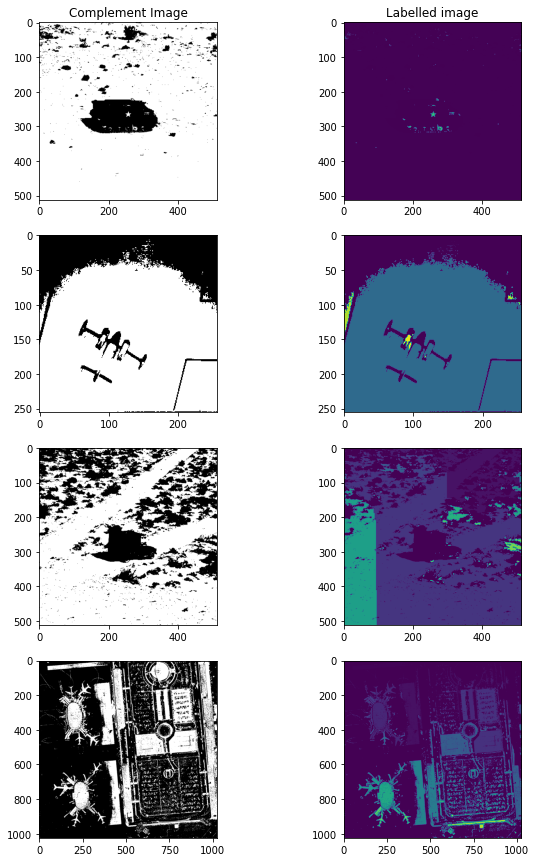

In [48]:
plt.rcParams["figure.figsize"] = (10,15)
plt.subplot(4, 2, 1)
plt.title("Complement Image")
plt.imshow(bin_img_apc_oa, cmap="gray")
plt.subplot(4, 2, 3)
plt.imshow(bin_img_airplane_oa, cmap="gray")
plt.subplot(4, 2, 5)
plt.imshow(bin_img_truck_oa, cmap="gray")
plt.subplot(4, 2, 7)
plt.imshow(bin_img_airport_oa, cmap="gray")


plt.subplot(4, 2, 2)
plt.title("Labelled image")
plt.imshow(R_apc)
plt.subplot(4, 2, 4)
plt.imshow(R_airplane)
plt.subplot(4, 2, 6)
plt.imshow(R_truck)
plt.subplot(4, 2, 8)
plt.imshow(R_airport)

## Q5

In [49]:
def minor_blob_removal(I, R,plot=False):
    (label, count) = np.unique(R.ravel(), return_counts=True)
    
    I_c = complement(I)  ## Complementing the given binary image
    
    m = label[np.argmax(count)] ## Maximum blob label
    
    new_I = I_c.copy()
    for i in range(new_I.shape[0]):
        for j in range(new_I.shape[1]):
            if(new_I[i, j]==0 and R[i, j]!=m):
                new_I[i, j] = 1
                
    new_I = complement(new_I) ## Complementing back the modified binary image
    
    if plot == True:
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(I, cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title("After Minor blob removal")
        plt.imshow(new_I, cmap="gray")
    return new_I

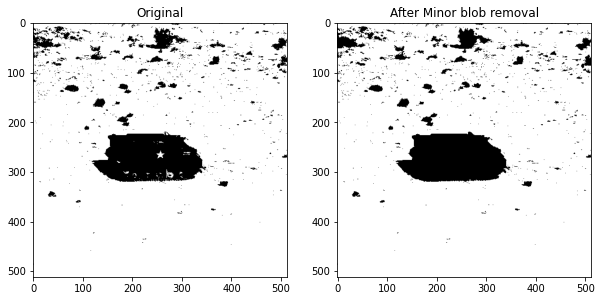

In [50]:
bin_img_apc_mbr = minor_blob_removal(bin_img_apc_oa, R_apc, plot=True)

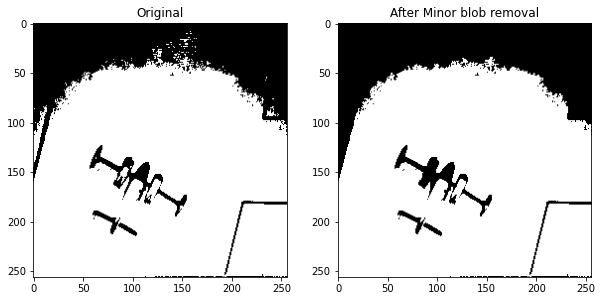

In [51]:
bin_img_airplane_mbr = minor_blob_removal(bin_img_airplane_oa, R_airplane, plot=True)

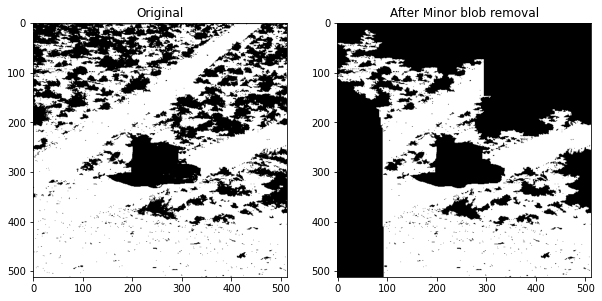

In [52]:
bin_img_truck_mbr = minor_blob_removal(bin_img_truck_oa, R_truck, plot=True)

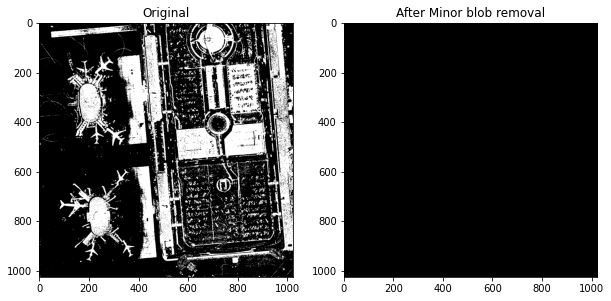

In [53]:
bin_img_airport_mbr = minor_blob_removal(bin_img_airport_oa, R_airport, plot=True)

Image Airport shows bizzare behaviour when we remove minor blobs is because we can observe that this binarized image looks in cintrast to others, i.e, major information is white and rest is black, but in other images it is opposite.\